## Use decision trees to prepare a model on fraud data 
Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Data Description :

- **Undergrad** : person is under graduated or not
- **Marital.Status** : marital status of a person
- **Taxable.Income** : Taxable income is the amount of how much tax an individual owes to the government 
- **Work Experience** : Work experience of an individual person
- **Urban** : Whether that person belongs to urban area or not

In [127]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from dataprep.eda import create_report

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".
This done by using describe data table.

In [10]:
df=data.copy()
df.columns


Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [37]:
df['Tax_category']=pd.cut(x=df['Taxable.Income'],bins=[10000, 30000,99619],labels = ['Risky', 'Good'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
 6   Tax_category     600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [39]:
df[df['Tax_category'].isnull()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_category


In [18]:
cat_feauters=df.describe(include=['object','category']).columns
cat_feauters

Index(['Undergrad', 'Marital.Status', 'Urban', 'Tax_category'], dtype='object')

In [15]:
num_feauters=df.describe(include=['int64']).columns
num_feauters

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

# Data Visualisation

### Univariate Plots

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')


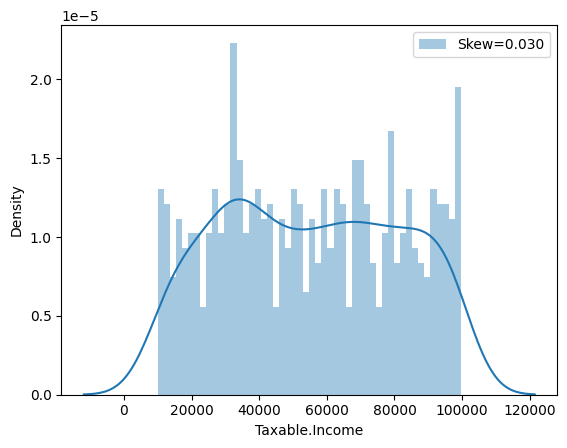

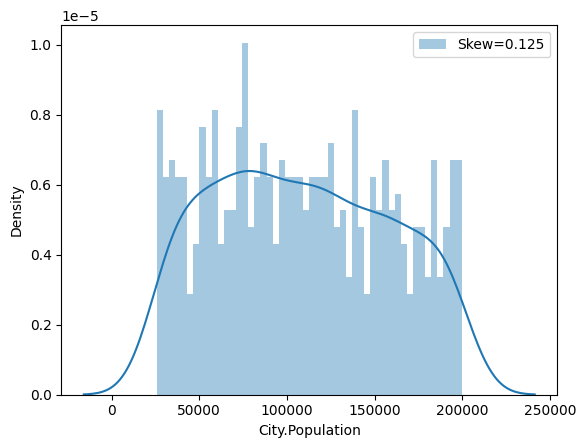

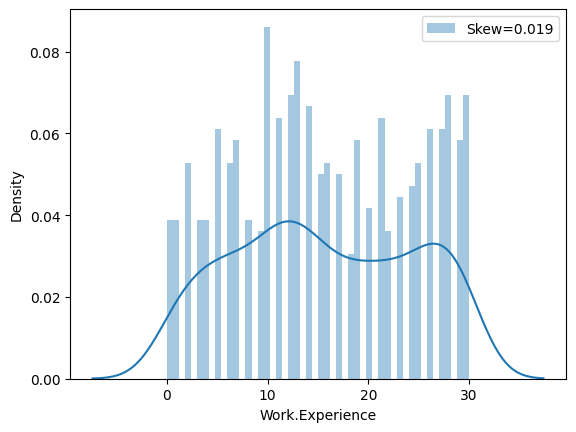

In [24]:
print(num_feauters)
for i in num_feauters:
    skew=df[i].skew()
    sn.distplot(df[i],kde=True,label='Skew=%.3f' %skew,bins=50)
    plt.legend(loc='best')
    plt.show()

In [ ]:
So we see in the bove plots that data is not normally distributed.

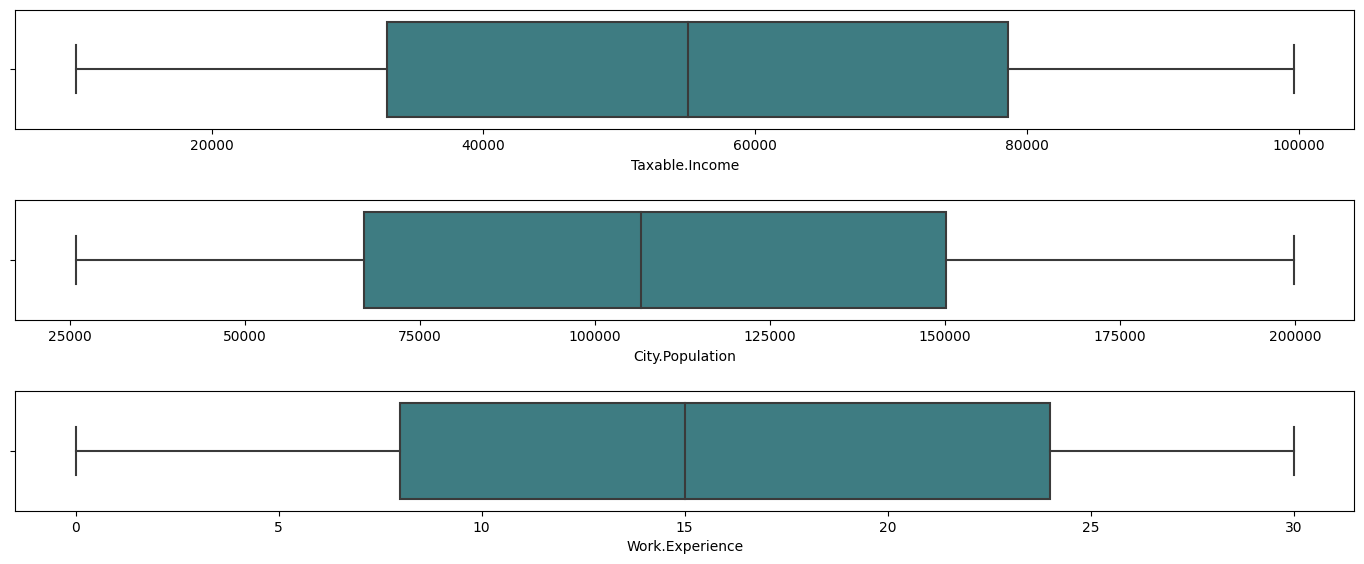

In [26]:
pt=df.copy()

fig, axes=plt.subplots(3,1,figsize=(14,6))
sn.boxplot(x='Taxable.Income',data=pt,palette='crest',ax=axes[0])
sn.boxplot(x='City.Population',data=pt,palette='crest',ax=axes[1])
sn.boxplot(x='Work.Experience',data=pt,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

There is no outlier present in dataset.

### Multivariate Plots
- pairplot
- Heatmap

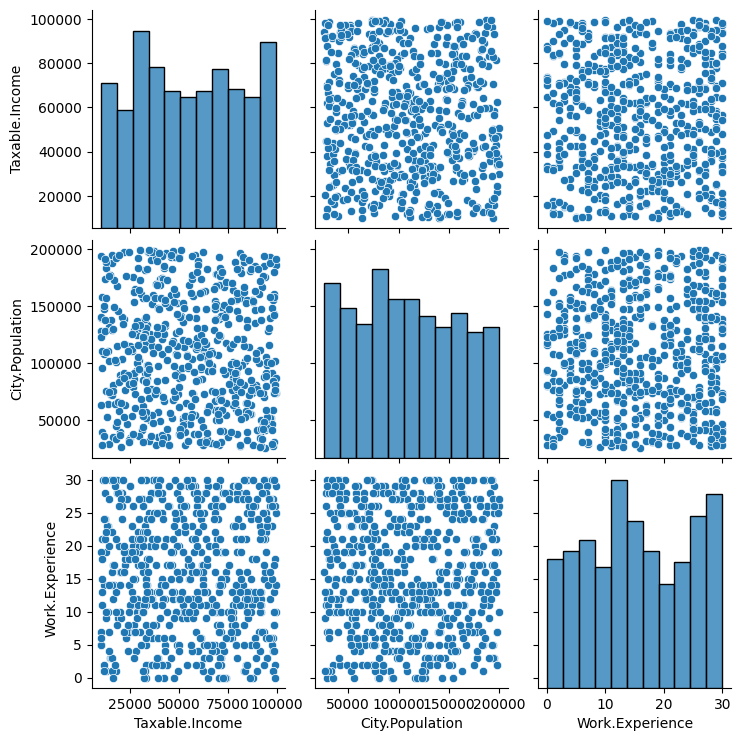

In [27]:
sn.pairplot(df)

In the above scatter plot the data is dense in every part of plot.
from tht we are not able to find the coor.

In [28]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot: >

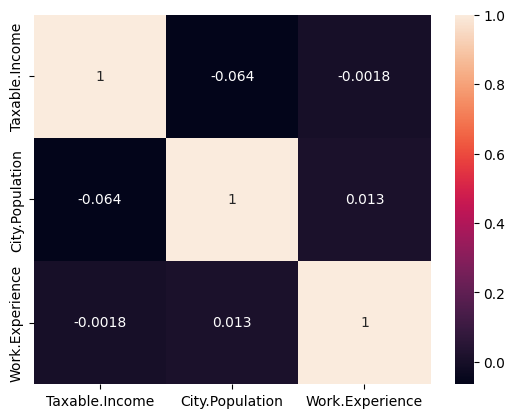

In [30]:
sn.heatmap(df.corr(),annot=True)

### Now we plot for Categorical Features

Index(['Undergrad', 'Marital.Status', 'Urban', 'Tax_category'], dtype='object')


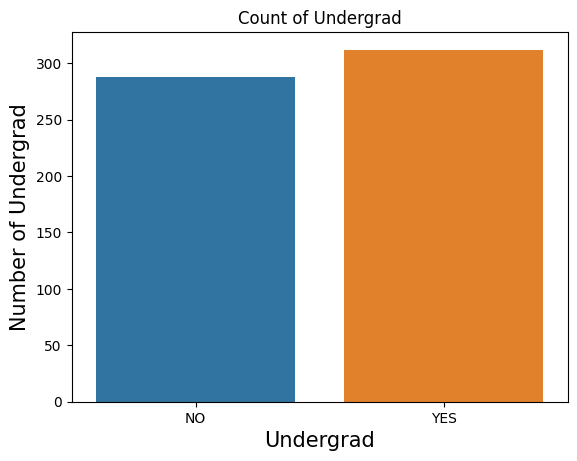

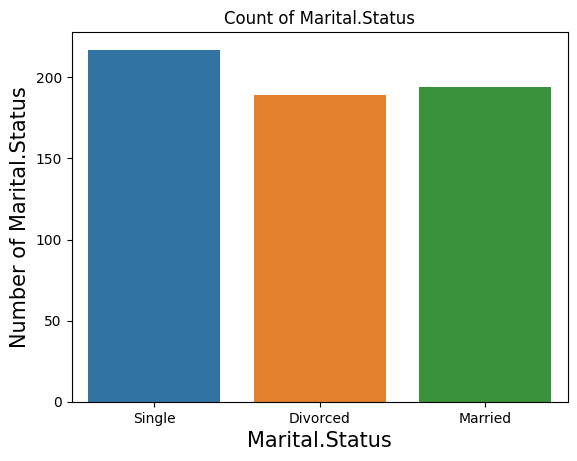

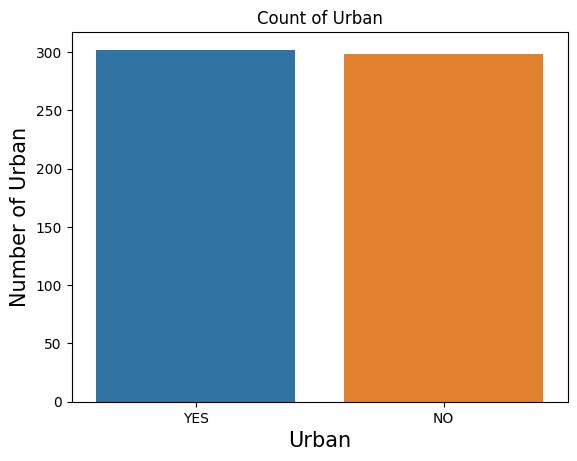

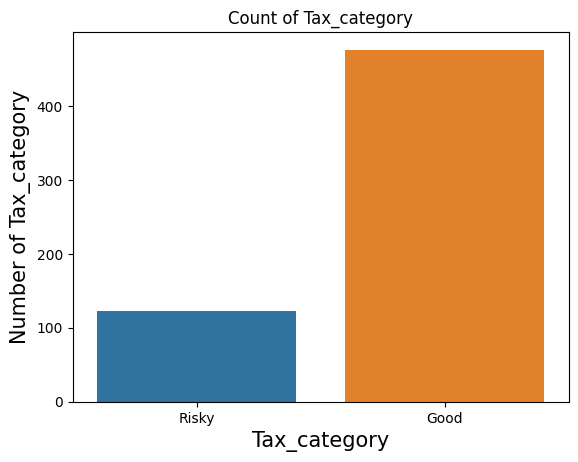

In [32]:
print(cat_feauters)

for i,column in enumerate (cat_feauters):
    unque=df[column].value_counts(ascending=False)
    plt.title('Count of ' + column)
    ax=sn.countplot(data=df,x=column)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Number of '+ column,fontsize=15)
    plt.show()
    

In [46]:
for column in cat_feauters:
    print(df[column].value_counts())
    print(' ')
 

YES    312
NO     288
Name: Undergrad, dtype: int64
 
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
 
YES    302
NO     298
Name: Urban, dtype: int64
 
Good     476
Risky    124
Name: Tax_category, dtype: int64
 


In [132]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax_category'],
      dtype='object')

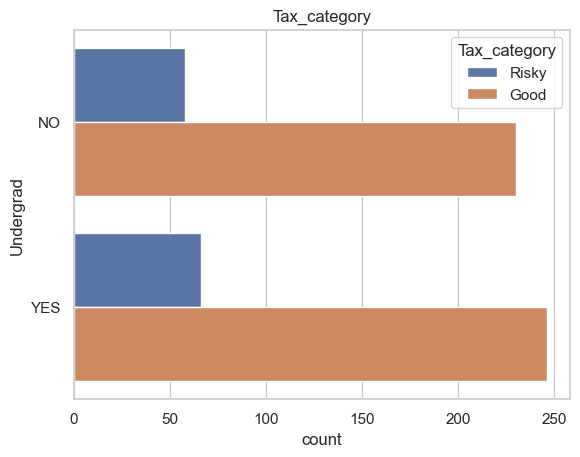

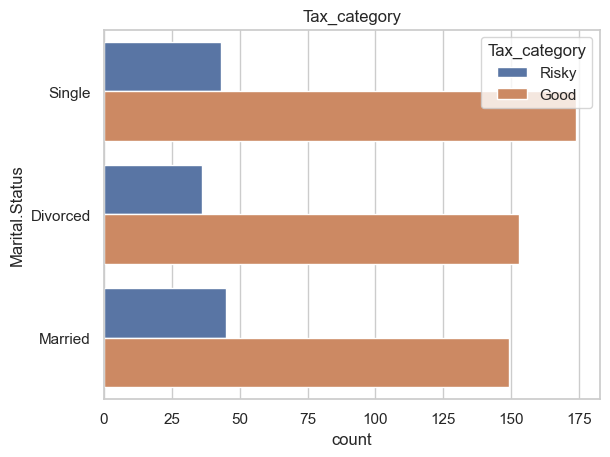

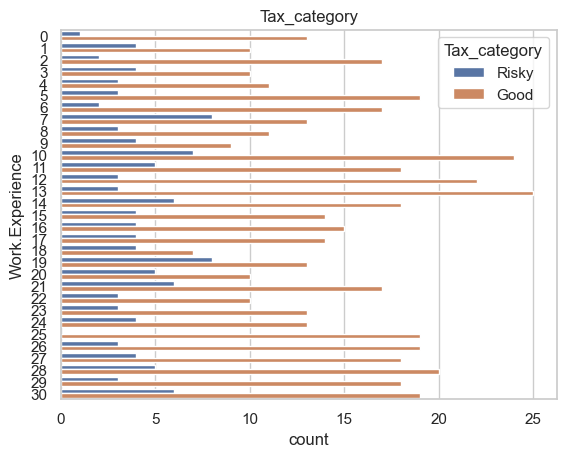

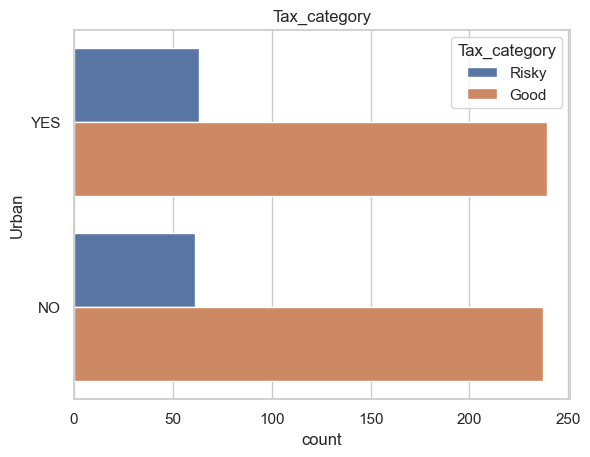

In [138]:
cols=['Undergrad', 'Marital.Status','Work.Experience', 'Urban']

for x in cols:
    sn.set(style="whitegrid")
    ax = sn.countplot(y=x, hue="Tax_category", data=df)
    plt.ylabel(x)
    plt.title('Tax_category')
    plt.show()

In [49]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [ ]:
### Label Encoding on categorical features

In [60]:
df1=df.copy()
cols=['Undergrad', 'Marital.Status', 'Urban', 'Tax_category']
label_encoder = preprocessing.LabelEncoder()
df1[cols]=df1[cols].apply(label_encoder.fit_transform)
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [61]:
for column in cat_feauters:
    print(df1[column].value_counts())
    print(' ')

1    312
0    288
Name: Undergrad, dtype: int64
 
2    217
1    194
0    189
Name: Marital.Status, dtype: int64
 
1    302
0    298
Name: Urban, dtype: int64
 
0    476
1    124
Name: Tax_category, dtype: int64
 


Undergrad:
- YES=1,NO=0
 
Marital Staus:
- Single=2,Married=1,Divorced=0

Urban:
- YES=1,No=0

Tax_category:
- Good=0,Risky =1

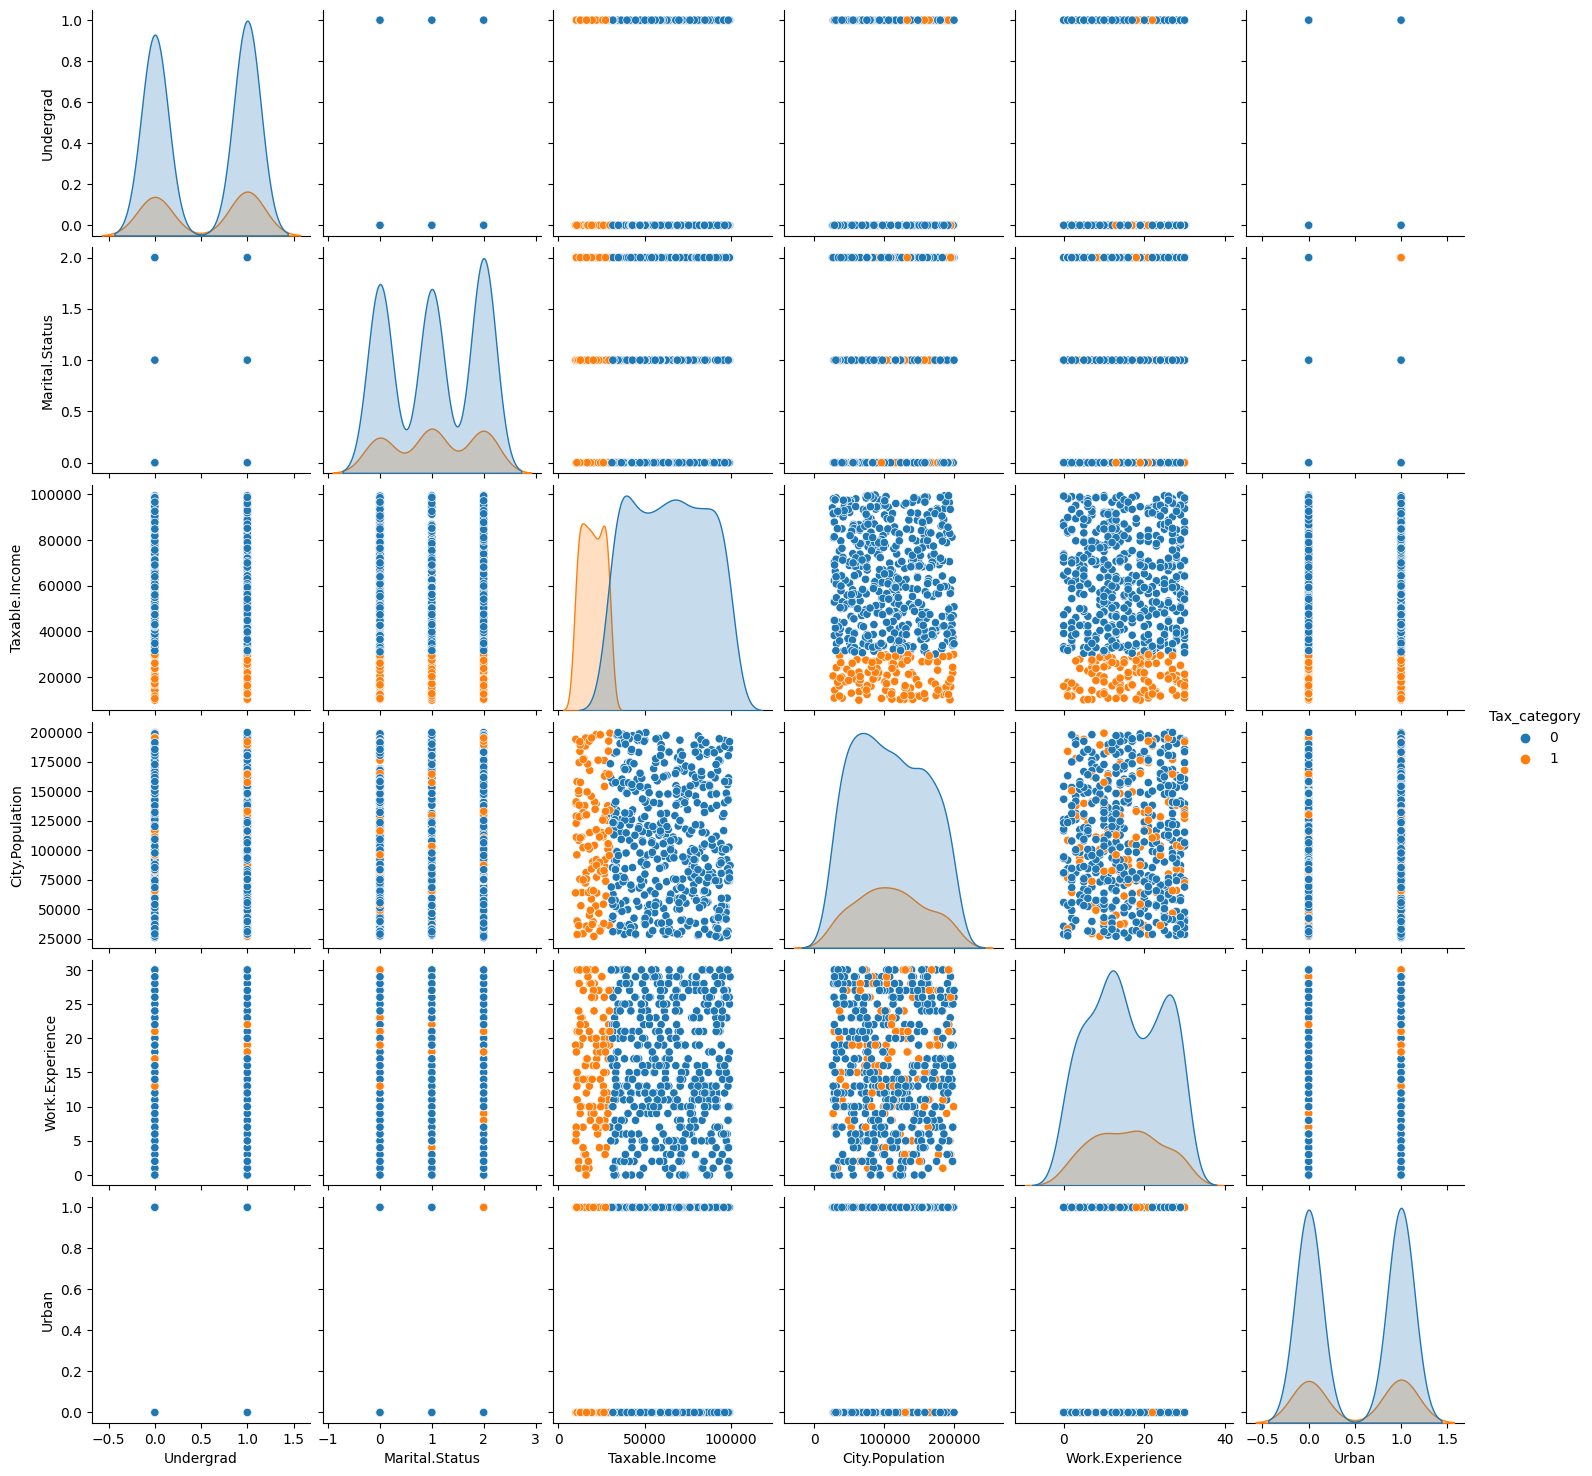

In [62]:
sn.pairplot(data=df1,hue='Tax_category')

In [71]:
x=df1.drop(columns='Tax_category',axis=0)
y=df1.Tax_category
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_category, Length: 600, dtype: int32

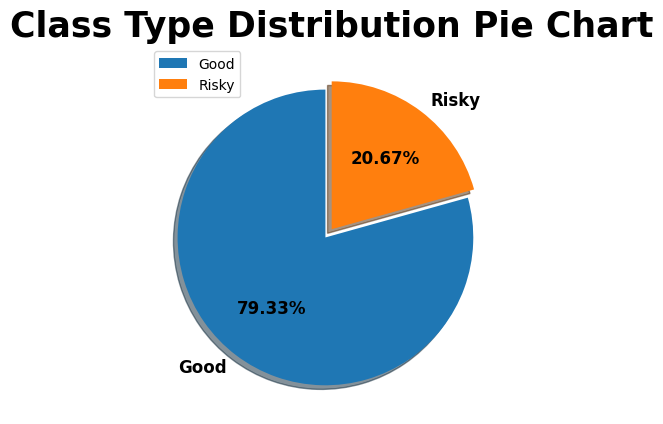

In [78]:
plt.pie(df['Tax_category'].value_counts(),
       labels=df.Tax_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 90,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'color':'black'})
plt.legend(loc= 'best')
plt.title("Class Type Distribution Pie Chart", fontsize = 25, fontweight = 'bold')
plt.show()

- This is imbalanced data. 
- Because 80% data is showing 'Good' and only 20% data 'Risky'.
- In such situation machine makes biased prediction.
- **Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.**

In [ ]:
### We make spliting of data

In [80]:
cols=['Taxable.Income','Tax_category']
x=df1.drop(columns=cols,axis=1)
y=df1.Tax_category
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [81]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_category, Length: 600, dtype: int32

In [97]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
378,1,0,152471,6,0
581,1,0,57473,10,1
447,0,1,166606,5,1
252,0,2,40855,28,1
561,0,1,36861,29,1
...,...,...,...,...,...
277,0,0,117364,11,0
9,1,0,155482,4,1
359,1,2,157299,11,0
192,1,1,126556,10,1


In [98]:
print('Shape of X_train: ',x_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of X_test: ',x_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (420, 5)
Shape of y_train:  (420,)
Shape of X_test:  (180, 5)
Shape of y_test:  (180,)


# Decision Tree

## Entropy

In [99]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model1.fit(x_train,y_train)
print(model1)
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

DecisionTreeClassifier(criterion='entropy', max_depth=6)
Test data Accuracy is: 73.33333333333333
Train data Accuracy is: 83.57142857142857


In [100]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model2.fit(x_train,y_train)
print(model2)
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)
#Predicting on train data
pred_train2 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

DecisionTreeClassifier(criterion='entropy', max_depth=4)
Test data Accuracy is: 75.55555555555556
Train data Accuracy is: 83.57142857142857


In [101]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model3.fit(x_train,y_train)

#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test)*100)
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train)*100)


Test data Accuracy is: 73.88888888888889
Train data Accuracy is: 82.38095238095238


In [108]:
pd.crosstab(y_test,pred_test2)

col_0,0,1
Tax_category,,
0,136,1
1,43,0


              precision    recall  f1-score   support

           0       0.76      0.99      0.86       137
           1       0.00      0.00      0.00        43

    accuracy                           0.76       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.58      0.76      0.66       180



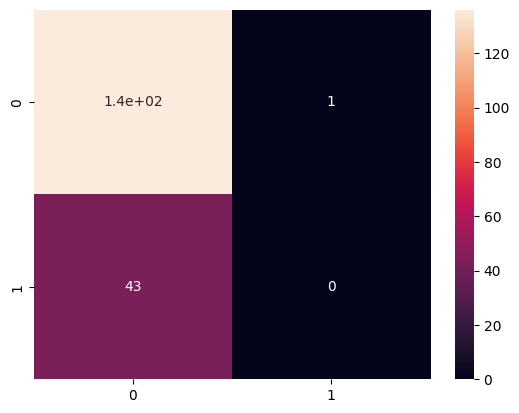

In [112]:
from sklearn.metrics import confusion_matrix
sn.heatmap(confusion_matrix(y_test, pred_test2),annot=True)
print(classification_report(y_test,pred_test2))
 

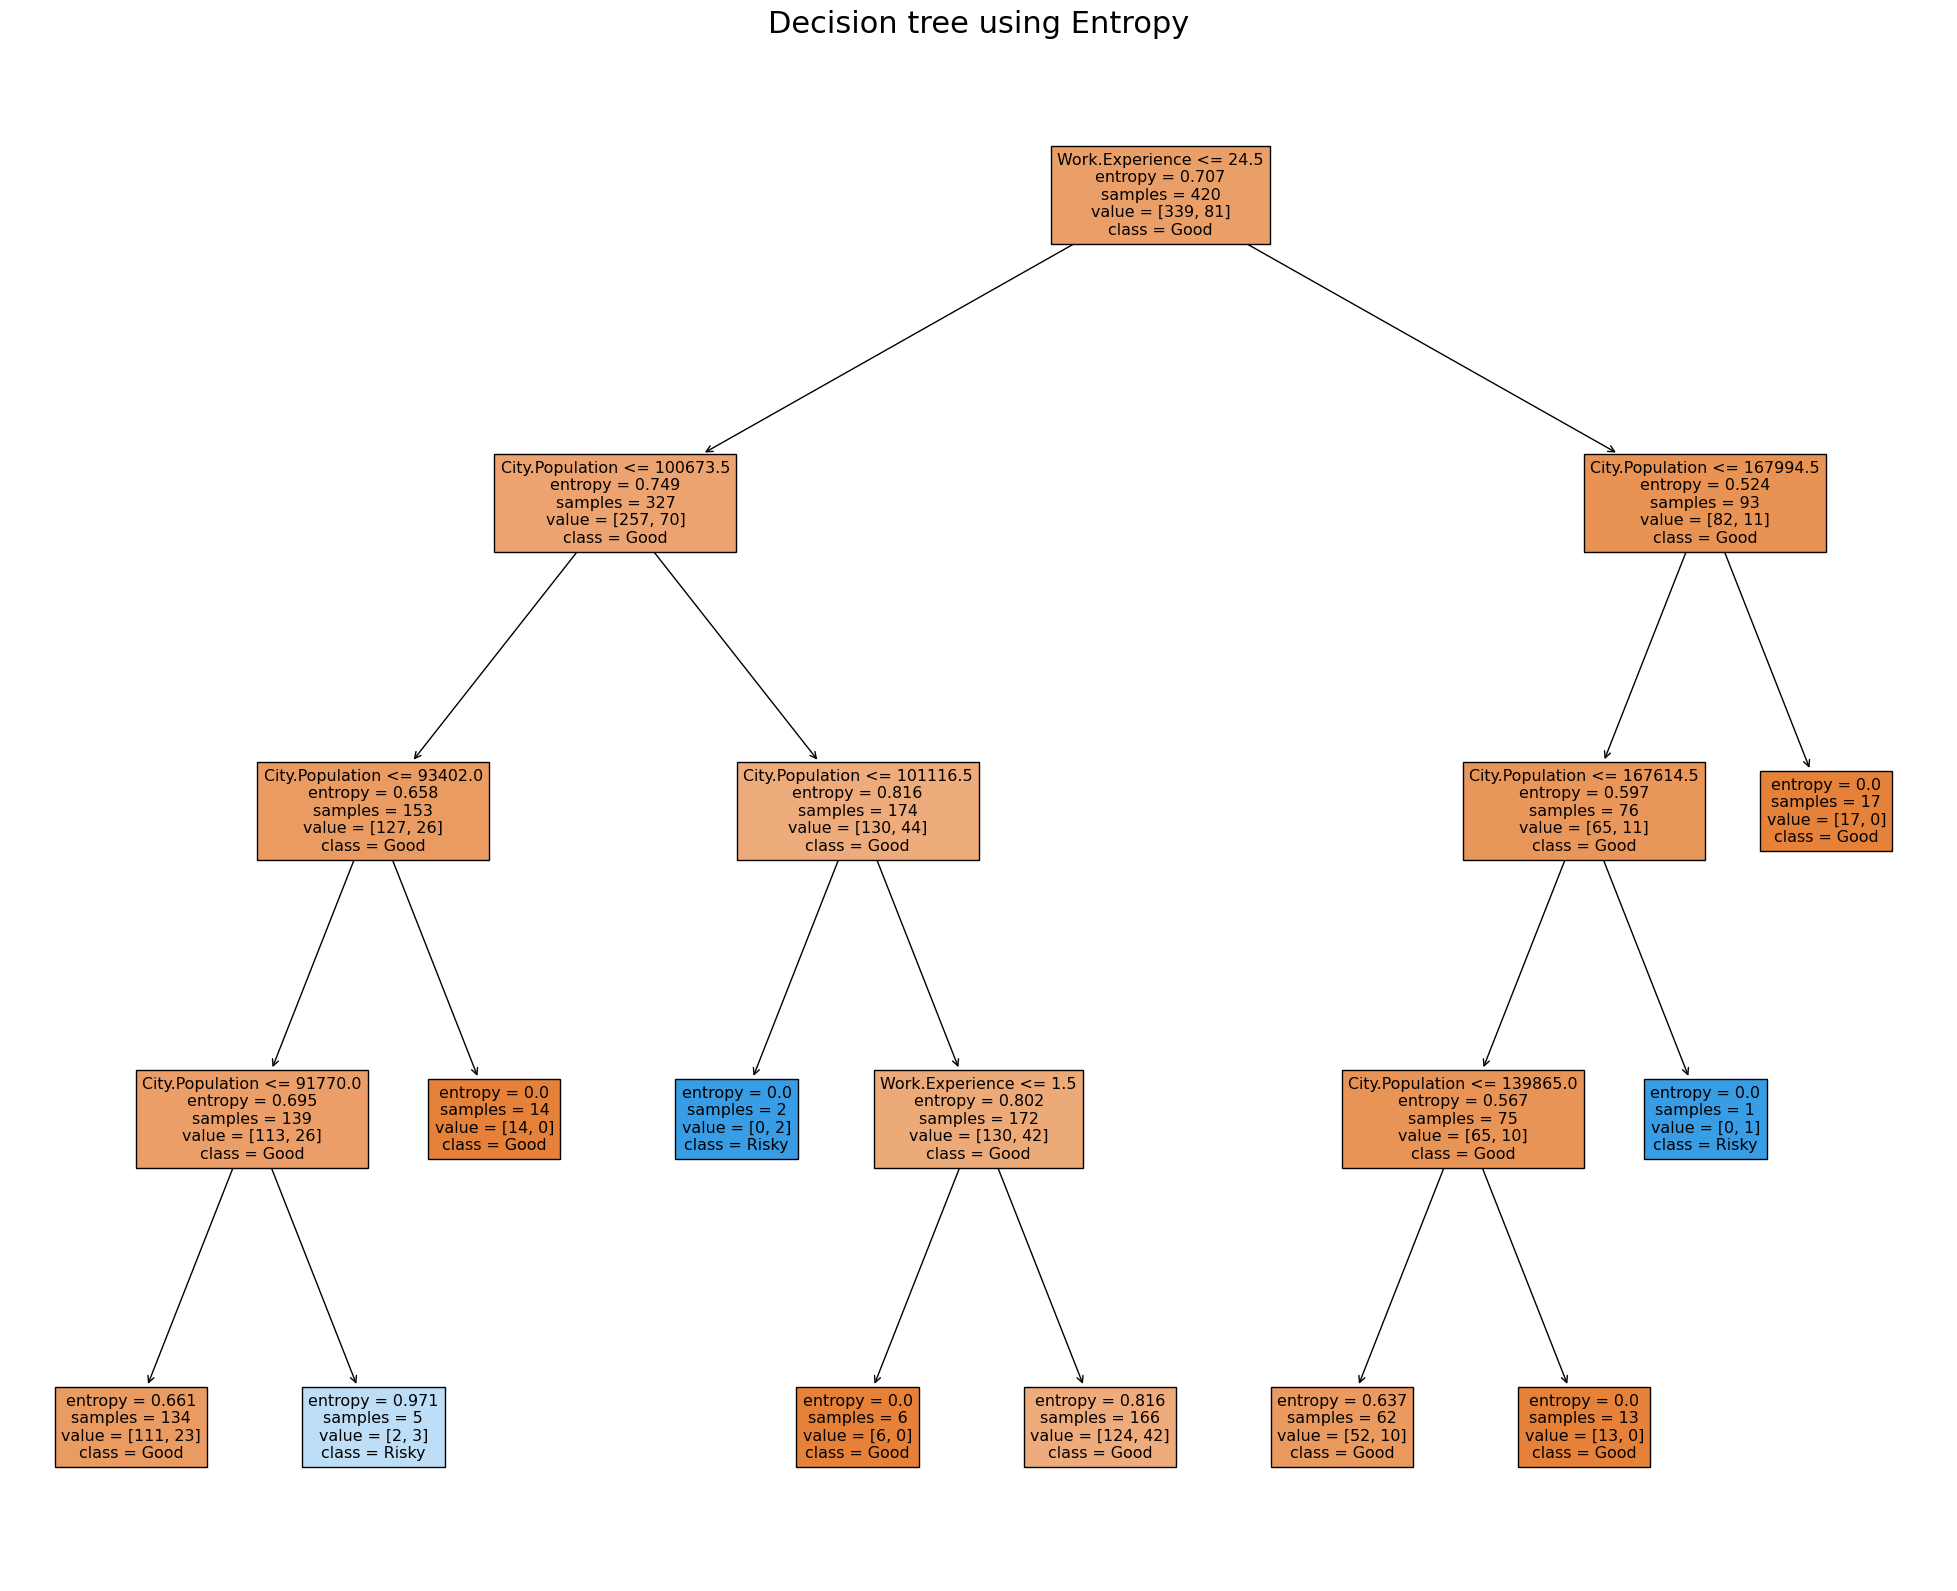

In [102]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
 feature_names= ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'], class_names= ['Good','Risky'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

## Gini Coefficient

In [103]:
model_gini1 = DecisionTreeClassifier(max_depth=4)
model_gini1.fit(x_train,y_train)
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 74.44444444444444
Train data Accuracy is: 82.61904761904762


In [104]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini2.fit(x_train,y_train)
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test)*100)
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train)*100)


Test data Accuracy is: 74.44444444444444
Train data Accuracy is: 82.85714285714286


In [107]:
pd.crosstab(y_test,pred_testg2)

col_0,0,1
Tax_category,,
0,131,6
1,40,3


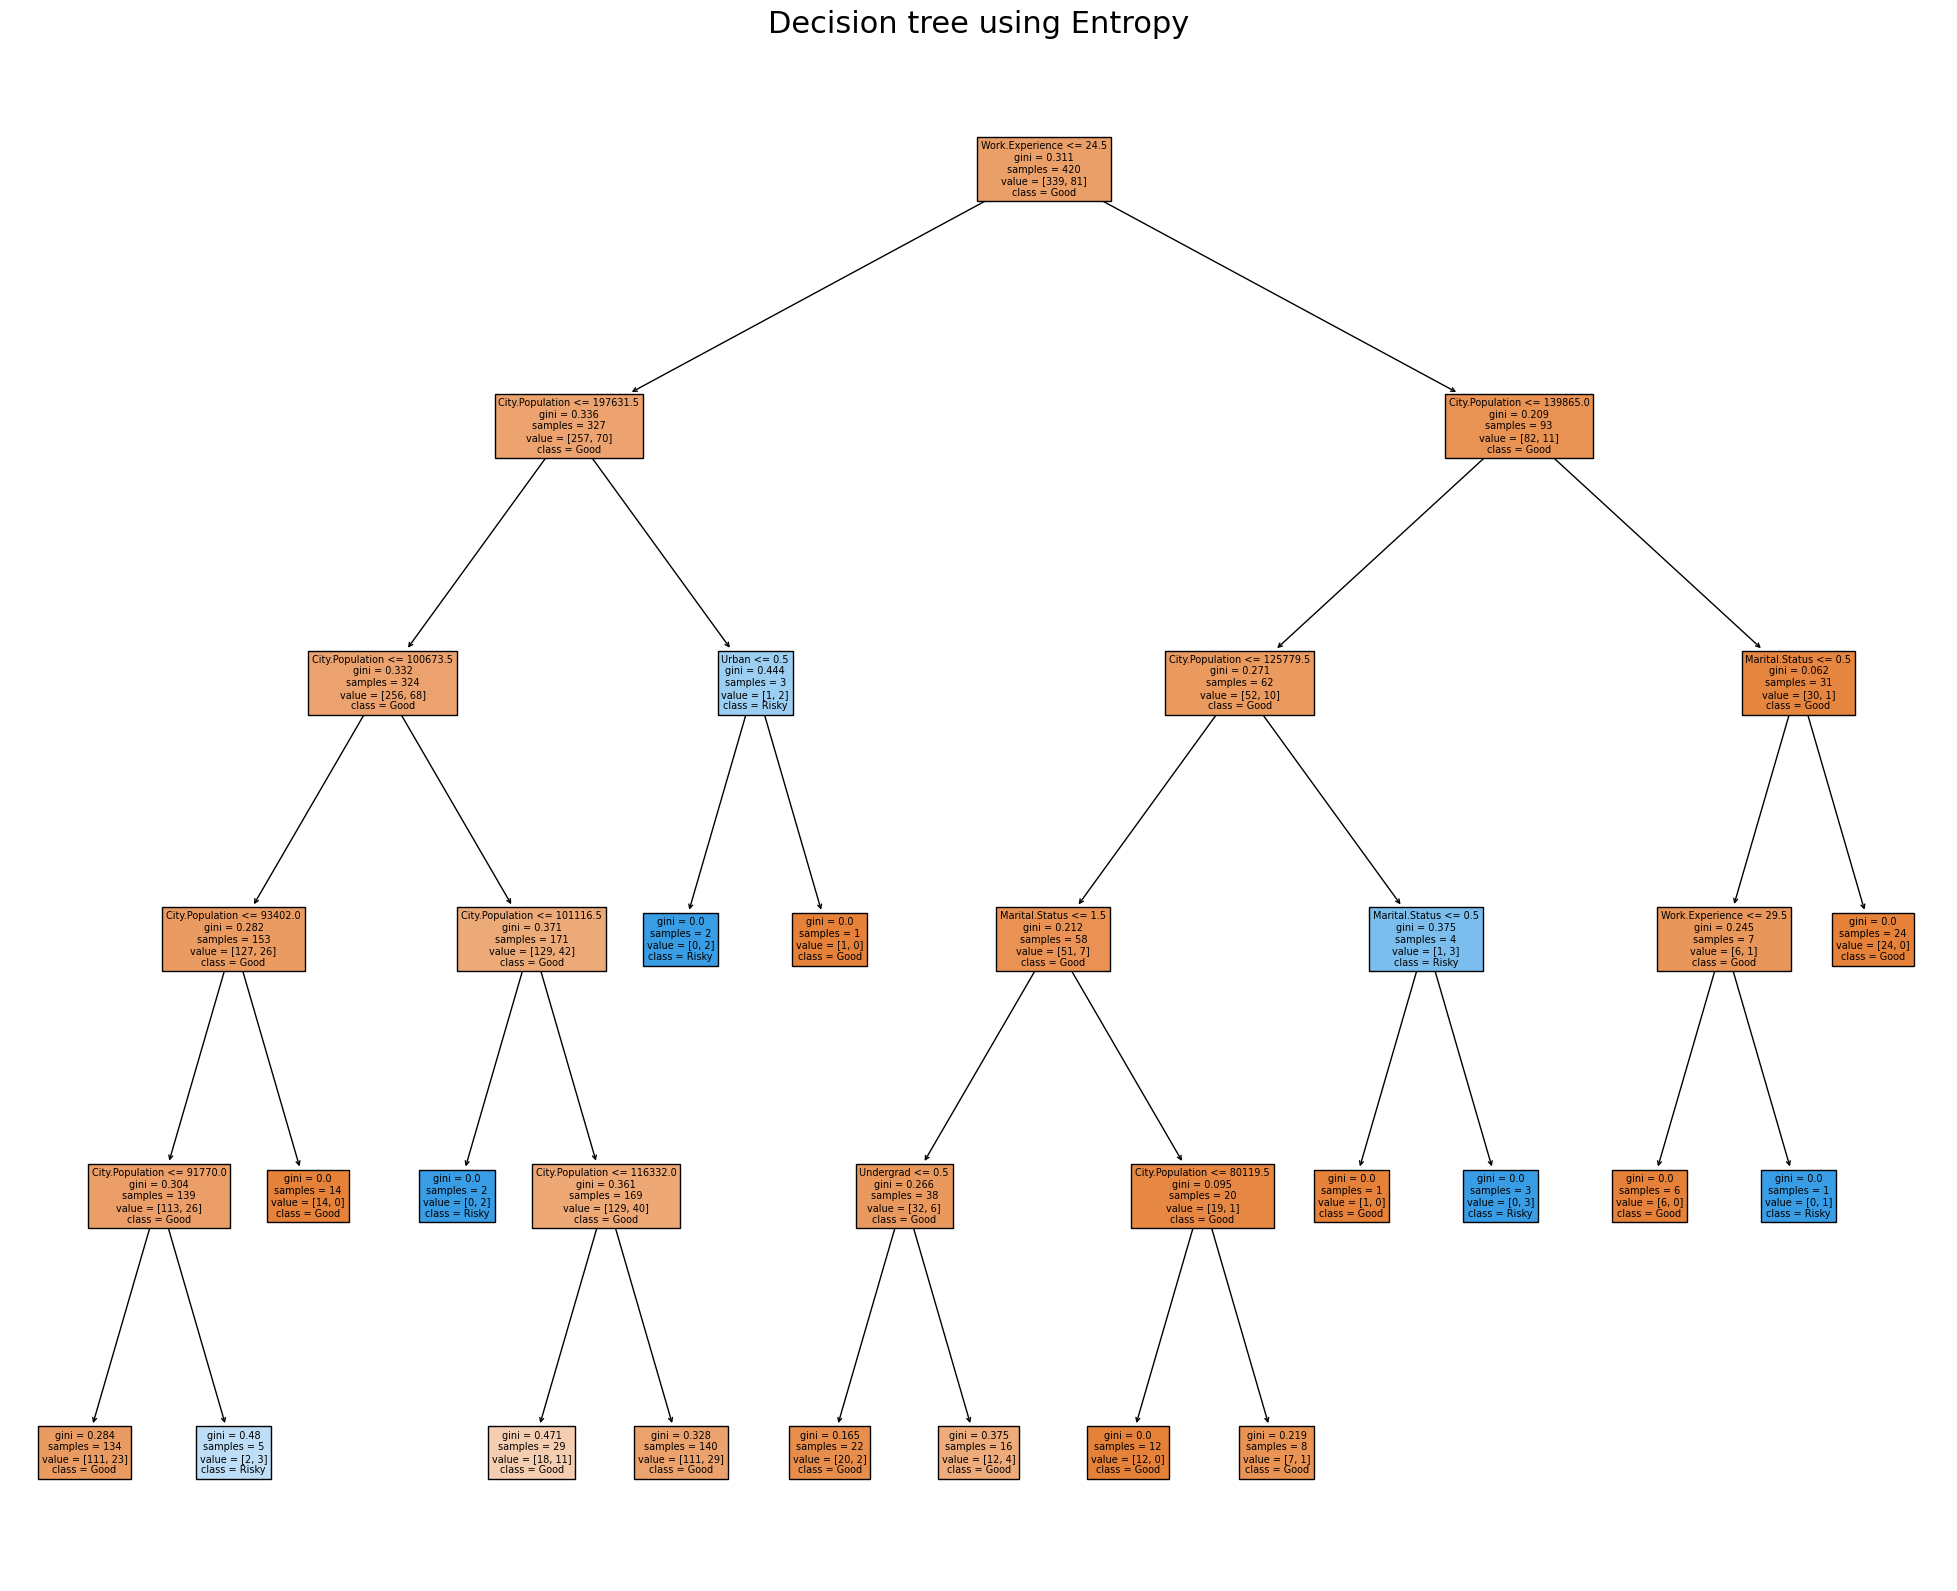

In [106]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini2,
 feature_names= ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'], class_names= ['Good','Risky'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       137
           1       0.33      0.07      0.12        43

    accuracy                           0.74       180
   macro avg       0.55      0.51      0.48       180
weighted avg       0.66      0.74      0.68       180



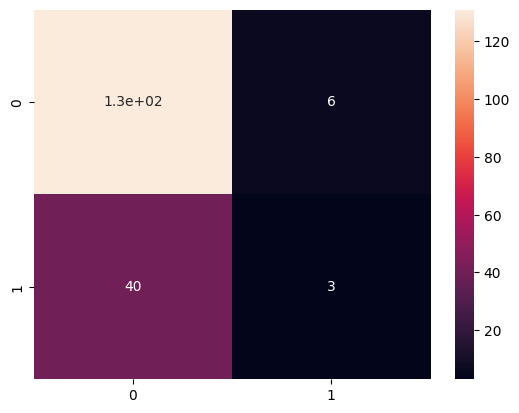

In [111]:
sn.heatmap(confusion_matrix(y_test, pred_testg2),annot=True)
print(classification_report(y_test,pred_testg2))
 

In [ ]:
# SMOTE Technique for normalising imbalanced dataset

### SMOTE: Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

**Working Procedure:**
- At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. 
- But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. 

In [116]:
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline



In [118]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


In [119]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 333})


In [125]:
Smodel1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
Smodel1.fit(x_train_sm,y_train_sm)
print(Smodel1)
#Predicting on test data
pred_test1 = Smodel1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = Smodel1.predict(x_train_sm)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train_sm)*100)

DecisionTreeClassifier(criterion='entropy', max_depth=6)
Test data Accuracy is: 53.333333333333336
Train data Accuracy is: 74.17417417417418


In [126]:
Smodel2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
Smodel2.fit(x_train_sm,y_train_sm)
print(Smodel2)
#Predicting on test data
pred_test2 = Smodel2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)
#Predicting on train data
pred_train2 = Smodel2.predict(x_train_sm)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train_sm)*100)

DecisionTreeClassifier(criterion='entropy', max_depth=4)
Test data Accuracy is: 52.77777777777778
Train data Accuracy is: 67.26726726726727


Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.56      0.65       143
           1       0.19      0.41      0.26        37

    accuracy                           0.53       180
   macro avg       0.49      0.48      0.46       180
weighted avg       0.66      0.53      0.57       180



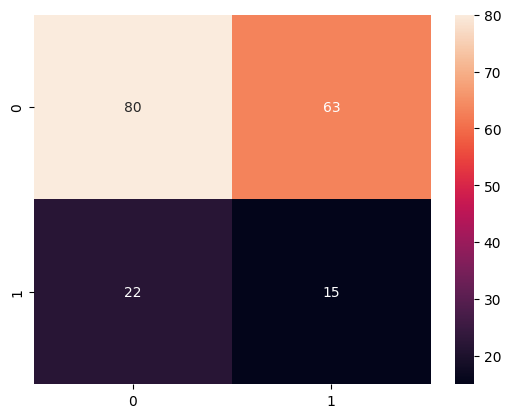

In [131]:
sn.heatmap(confusion_matrix(y_test, pred_test2),annot=True,fmt = "d")
print('Classification Report \n',classification_report(y_test,pred_test2))

### So we can see that there is drastic reduction in accuracy score after SMOTE